<a href="https://colab.research.google.com/github/Aanjneya007/Group-9-Traffic-Volume-Prediction-Using-regression/blob/main/Aanjneya_Nayak_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 141795.73
R-squared: 0.96


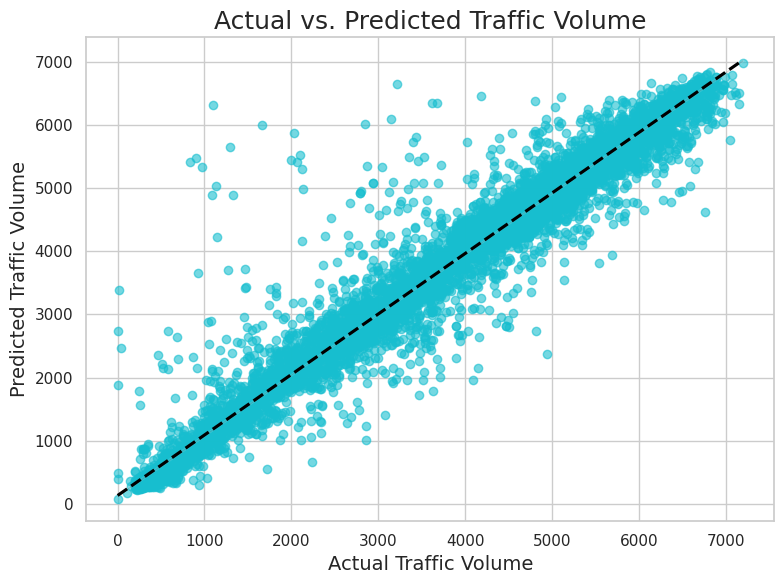

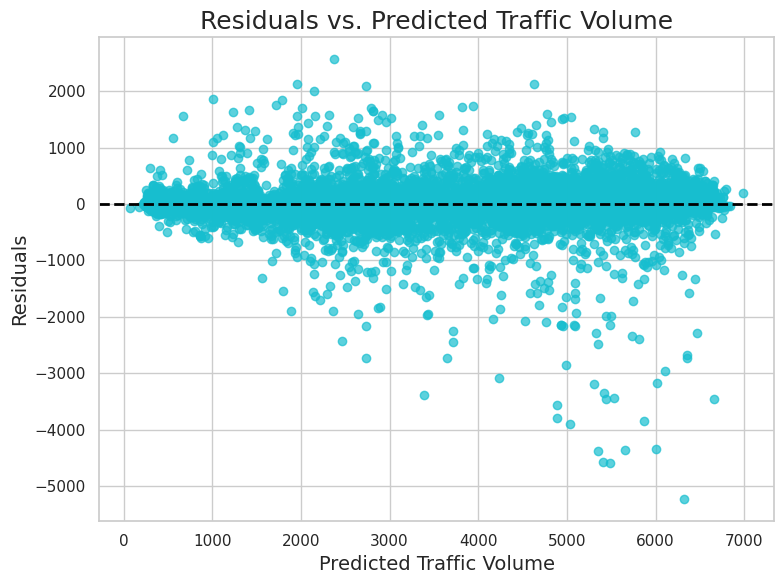

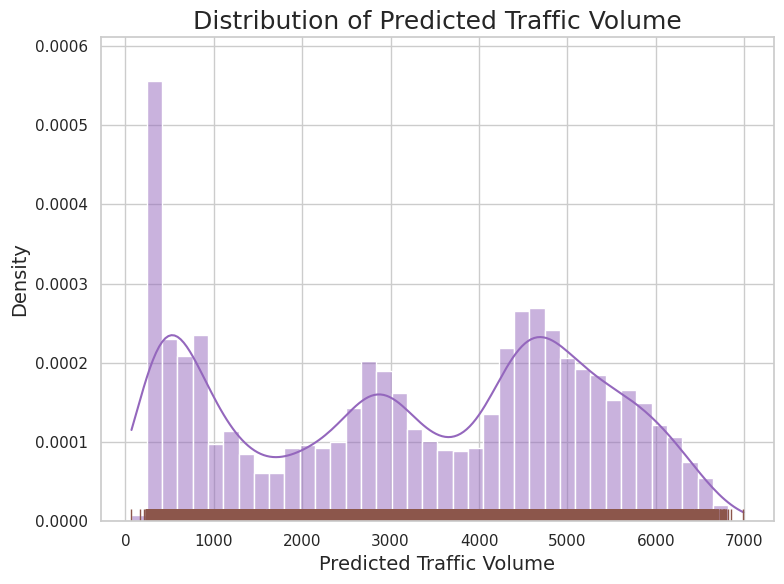

<ipython-input-8-ff0d527aa11d>:90: FutureWarning: The provided callable <function mean at 0x78baff5fdda0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = df.pivot_table(values='traffic_volume', index='hour', columns='weekday', aggfunc=np.mean)


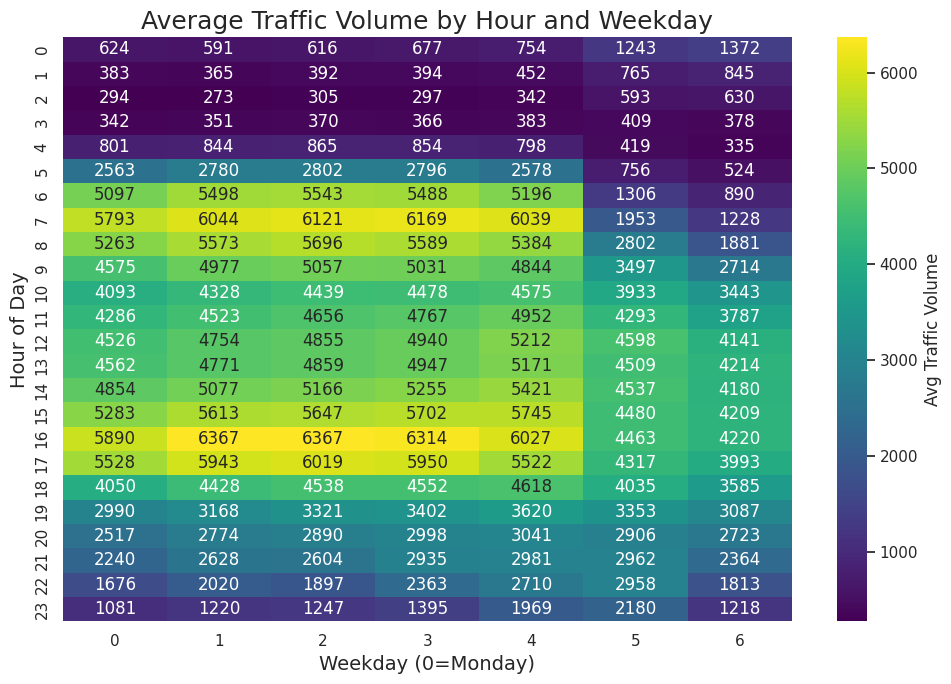

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
# Make sure the CSV file is in the correct path or update the path accordingly
df = pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv')

# Feature Engineering
# Convert 'date_time' to datetime for time-based feature extraction
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract year, month, day, hour, and weekday from 'date_time'
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day
df['hour'] = df['date_time'].dt.hour
df['weekday'] = df['date_time'].dt.dayofweek  # Monday=0, Sunday=6

# One-hot encode categorical variables to convert them into numeric format
df = pd.get_dummies(df, columns=['weather_main', 'weather_description', 'holiday'], drop_first=True)

# Define features (X) and target variable (y)
X = df.drop(['date_time', 'traffic_volume'], axis=1)
y = df['traffic_volume']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict traffic volume on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model performance using Mean Squared Error and R-squared metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Calculate residuals (difference between actual and predicted values)
residuals = y_test - y_pred

# Set Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid", palette="pastel")

# 1. Actual vs. Predicted Traffic Volume with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6, 'color':'#17becf'}, line_kws={'color':'#000000', 'linestyle':'--'})
plt.xlabel('Actual Traffic Volume', fontsize=14)
plt.ylabel('Predicted Traffic Volume', fontsize=14)
plt.title('Actual vs. Predicted Traffic Volume', fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Residual Plot with dashed zero line
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='#17becf', alpha=0.7)
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Predicted Traffic Volume', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs. Predicted Traffic Volume', fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Distribution of Predicted Traffic Volume with KDE and rug plot
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, kde=True, color='#9467bd', bins=40, stat='density')
sns.rugplot(y_pred, color='#8c564b')
plt.xlabel('Predicted Traffic Volume', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Predicted Traffic Volume', fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Heatmap of average traffic volume by hour and weekday
# Pivot table to calculate mean traffic volume for each hour and weekday
heatmap_data = df.pivot_table(values='traffic_volume', index='hour', columns='weekday', aggfunc=np.mean)
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='viridis', cbar_kws={'label': 'Avg Traffic Volume'})
plt.title('Average Traffic Volume by Hour and Weekday', fontsize=18)
plt.xlabel('Weekday (0=Monday)', fontsize=14)
plt.ylabel('Hour of Day', fontsize=14)
plt.tight_layout()
plt.show()
